In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 


In [2]:
crypto_details_df = pd.read_csv('crypto_details.csv')
crypto_details_df.head(20)

,timestamp,timestamp.1,date,Asset_ID,Asset_Name,Weight,Count,Volume,Open,High,Low,Close,VWAP,Target
0,0,1514764860,2018-01-01 00:01:00,2,Bitcoin Cash,2.397895,40.0,19.233005,2376.580000,2399.5000,2357.1400,2374.590000,2373.116392,-0.004218
1,1,1514764860,2018-01-01 00:01:00,9,Litecoin,2.397895,167.0,411.896642,225.330000,227.7800,222.9800,225.206667,225.197944,-0.009791
2,2,1514764860,2018-01-01 00:01:00,11,Monero,1.609438,7.0,6.635710,329.090000,329.8800,329.0900,329.460000,329.454118,0.000000
3,3,1514764860,2018-01-01 00:01:00,0,Binance Coin,4.304065,5.0,78.380000,8.530000,8.5300,8.5300,8.530000,8.530000,-0.014399
4,4,1514764860,2018-01-01 00:01:00,6,Ethereum,5.894403,173.0,335.987856,738.302500,746.0000,732.5100,738.507500,738.839291,-0.004809
5,5,1514764860,2018-01-01 00:01:00,7,Ethereum Classic,2.079442,5.0,121.087310,25.920000,25.9200,25.8740,25.877000,25.891363,-0.008264
6,6,1514764860,2018-01-01 00:01:00,5,EOS.IO,1.386294,32.0,6626.713370,7.659600,7.6596,7.6567,7.657600,7.657713,-0.013922
7,7,1514764860,2018-01-01 00:01:00,1,Bitcoin,6.779922,229.0,31.550062,13835.194000,14013.8000,13666.1100,13850.176000,13827.062093,-0.014643
8,8,1514764920,2018-01-01 00:02:00,7,Ethereum Classic,2.079442,1.0,1.468019,25.897000,25.8970,25.8970,25.897000,25.897000,-0.029902
9,9,1514764920,2018-01-01 00:02:00,1,Bitcoin,6.779922,235.0,31.046432,13835.036000,14052.3000,13680.0000,13828.102000,13840.362591,-0.015037


In [3]:
#Separate Target Variable and Predictor Variables
crypto_details_df = pd.read_csv("crypto_details.csv")
x = ['Target']
y =['Asset_ID', 'Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']
X=crypto_details_df.values
y=crypto_details_df.values


(['Target'],
 array([[0, 1514764860, '2018-01-01 00:01:00', ..., 2374.59,
         2373.1163915061647, -0.0042181523874292],
        [1, 1514764860, '2018-01-01 00:01:00', ..., 225.20666666666668,
         225.1979435524601, -0.0097914226840802],
        [2, 1514764860, '2018-01-01 00:01:00', ..., 329.46,
         329.4541176122712, 0.0],
        ...,
        [15655677, 1632182400, '2021-09-21 00:00:00', ..., 541.045,
         541.6845040779866, 0.0],
        [15655678, 1632182400, '2021-09-21 00:00:00', ...,
         156.94385714285713, 156.9943187447324, 0.0],
        [15655679, 1632182400, '2021-09-21 00:00:00', ..., 232.275,
         232.5696965327058, 0.0]], dtype=object))

In [12]:
X = X.reshape(X.shape[:])

In [26]:
#Split the data into training and testing set
xtrain, Xtest, ytrain, Ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [28]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [29]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9999972108509142


In [30]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.84


In [33]:
ypred = xgbr.predict(Xtest)
mse = mean_squared_error(Ytest, ypred)
print("MSE: %.2f" % mse)

MSE: 9.11


In [34]:
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 3.02


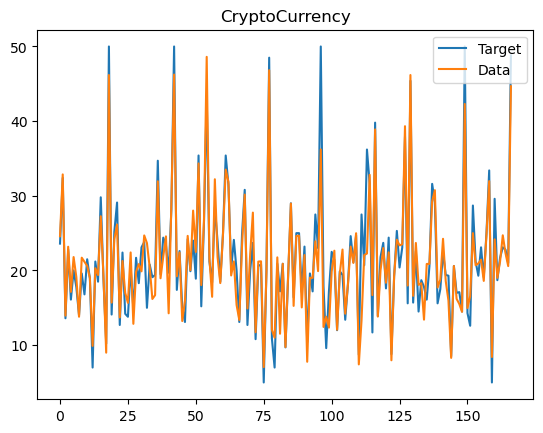

In [35]:
x_ax = range(len(Ytest))
plt.plot(x_ax, Ytest, label="Target")
plt.plot(x_ax, ypred, label="Data")
plt.title("CryptoCurrency")
plt.legend()
plt.show()